In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
sales = pd.read_csv('/Users/sima/Desktop/Springboard/excercise/sales_data.csv')
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


Explanatory data analysis:


In [39]:
# identify which year the revenue was the highest, it shows it was 2015
sales.groupby(["Year"]).sum().sort_values('Revenue',ascending=False)

,Day,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Year,,,,,,,,
2015,385623,861101,289517,6749676,11477672,7528563,12495428,20023991
2016,457232,1077289,370813,5245385,8976667,7035948,10677437,17713385
2013,385623,861101,294787,6749676,11477672,5959208,9280829,15240037
2014,457232,1077289,379585,5245385,8976667,5864087,8288637,14152724
2012,42542,91692,5354,3111995,5144835,2951993,6223990,9175983
2011,42542,91692,5260,3111995,5144835,2881301,6083587,8964888


In [40]:
column_order = ['January','February','March','April','May','June','July','August',
       'September', 'October', 'November','December']

Our plot shows that the number of bike sold on May, June and December are the highest! Since the company sells bikes, it makes sence for people to purchase bike in Summer time and on December for holidays

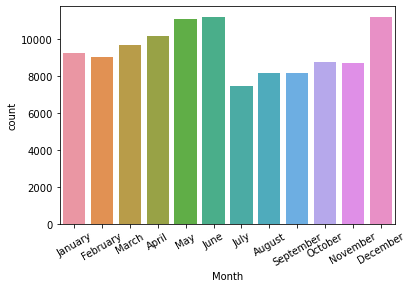

In [41]:
ax = sns.countplot(x = 'Month', data=sales, order=column_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

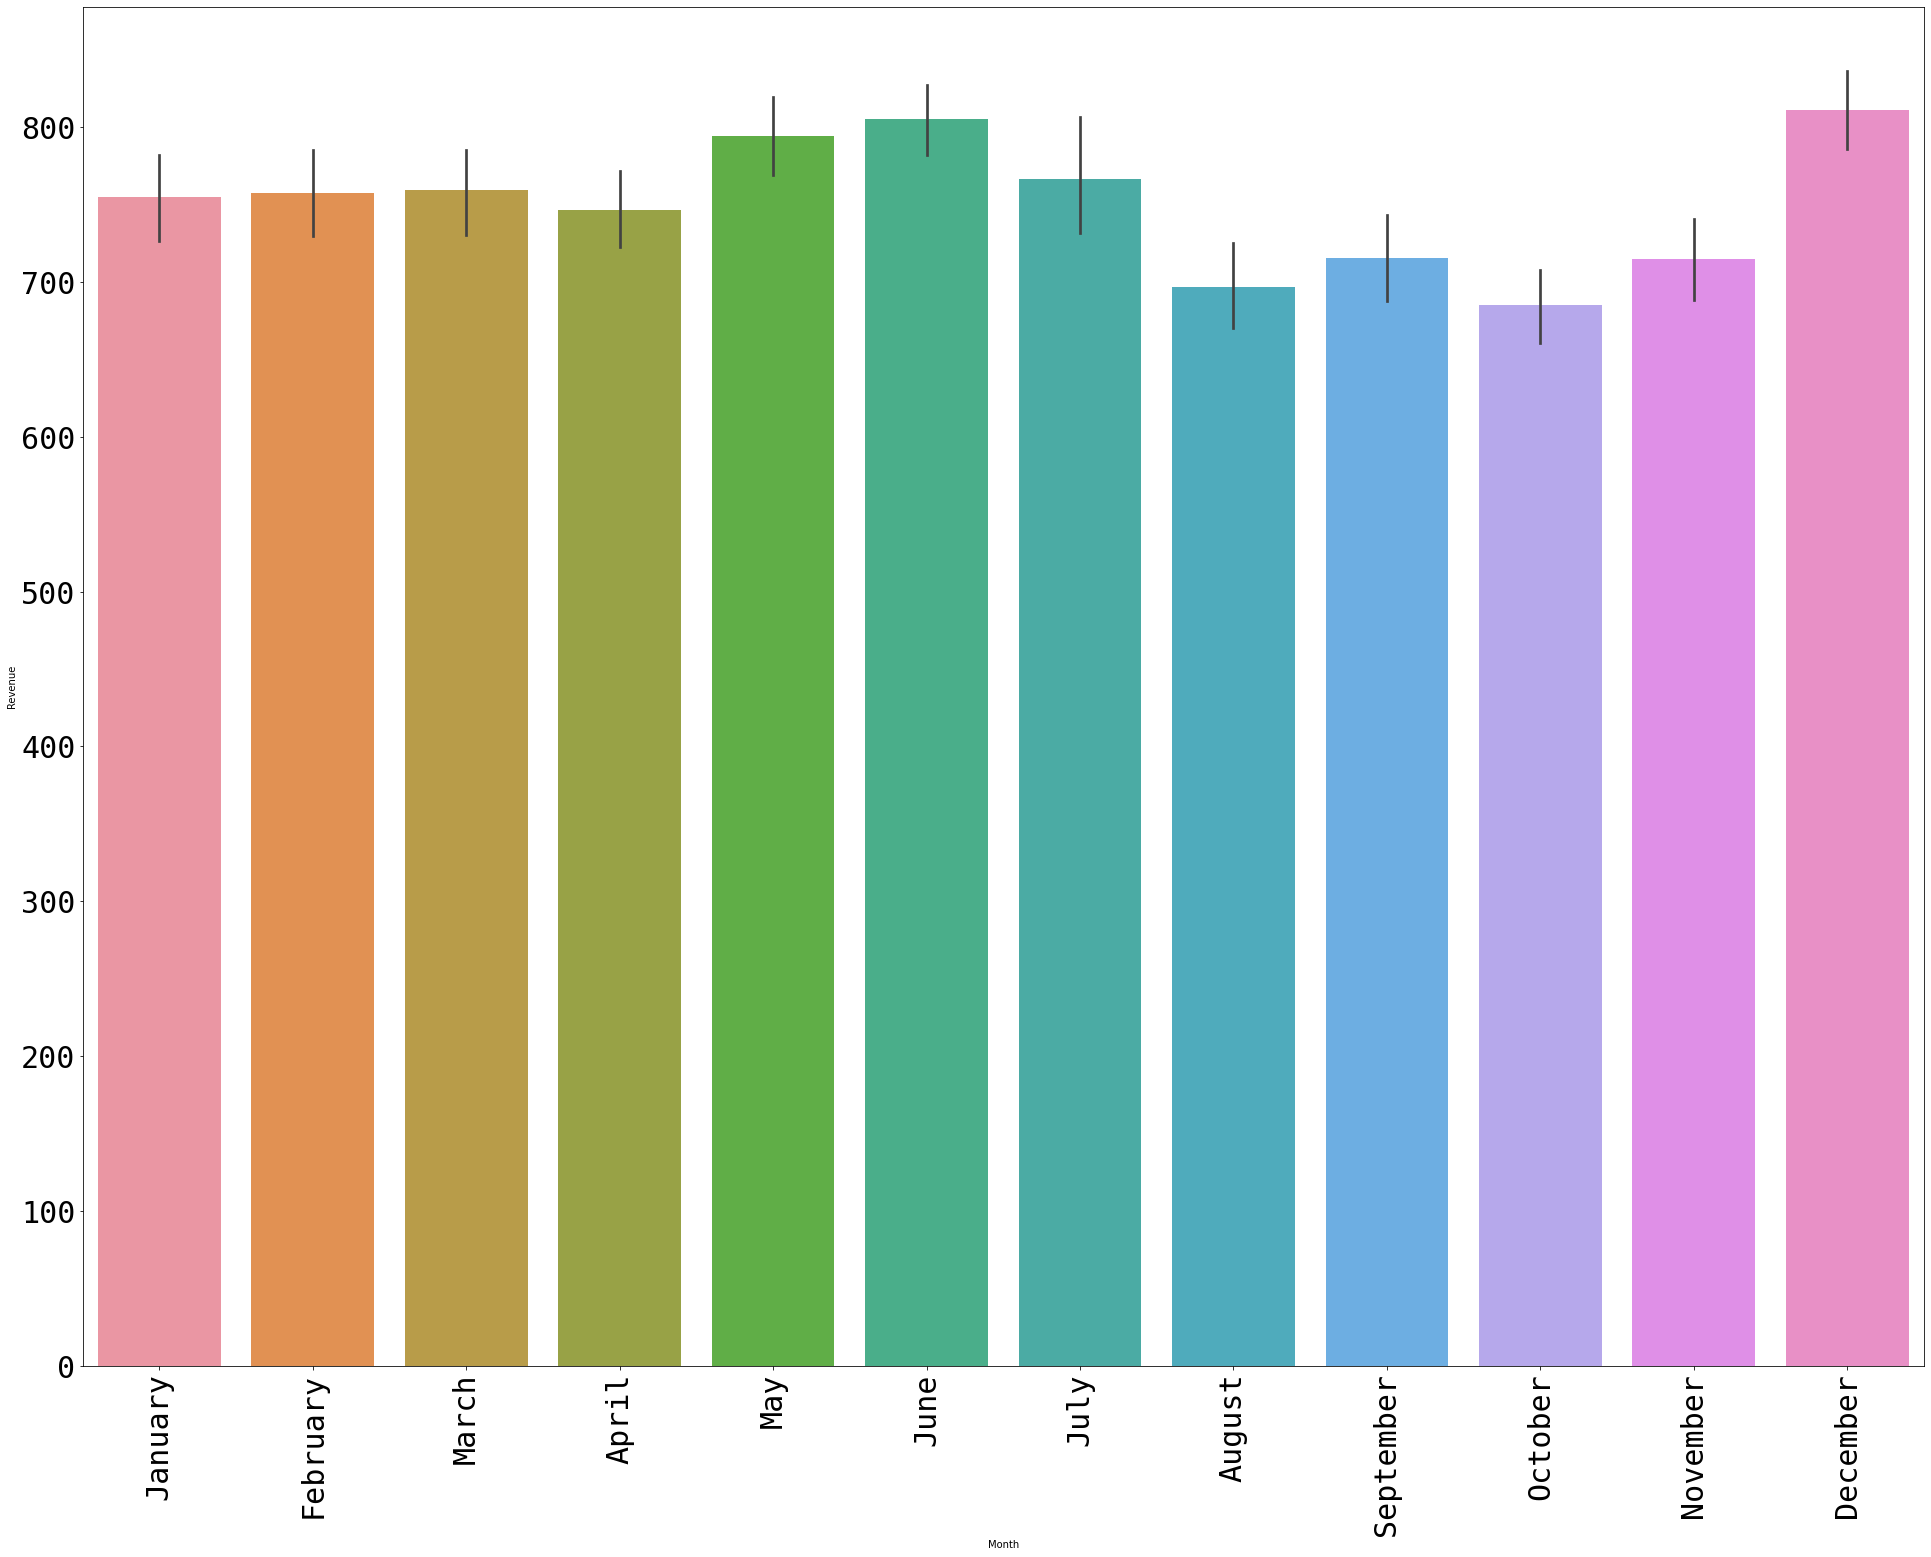

In [42]:
plt.figure(figsize = (33,25))
ax=sns.barplot(x='Month', y='Revenue', data=sales, order=column_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(fontsize=30, fontname='monospace')
plt.yticks(fontsize=30, fontname='monospace');

In [43]:
TA = sales.groupby(['Month','Year'])['Revenue'].sum().sort_values(ascending=False)
TA.head(50)

Month      Year
December   2015    3848211
June       2016    3586300
May        2016    3264343
December   2013    2995953
November   2015    2836222
June       2014    2786120
April      2016    2756864
March      2016    2608663
May        2014    2587491
January    2016    2553065
October    2015    2529084
September  2015    2465172
February   2016    2444190
November   2013    2232077
April      2014    2204586
August     2015    2140581
March      2014    2108212
October    2013    2041128
January    2014    2003941
September  2013    1988996
February   2014    1945487
August     2013    1763071
July       2015    1728398
           2013    1230711
December   2011    1132666
           2012    1110101
August     2012     927504
May        2015     895043
July       2011     882219
August     2011     880037
July       2012     863284
June       2015     786480
May        2012     765660
March      2012     740824
April      2015     734608
May        2011     734537
April      2

In [44]:
TA1 = sales.groupby('Month')['Revenue'].sum().sort_values(ascending=False)
TA1

Month
December     9086931
June         9043008
May          8836763
April        7602750
March        7347164
January      7005895
February     6834583
November     6244298
October      5995079
September    5841885
July         5721459
August       5711193
Name: Revenue, dtype: int64

In [45]:
TA1= TA1.reset_index()

In [46]:
TA= TA.reset_index()

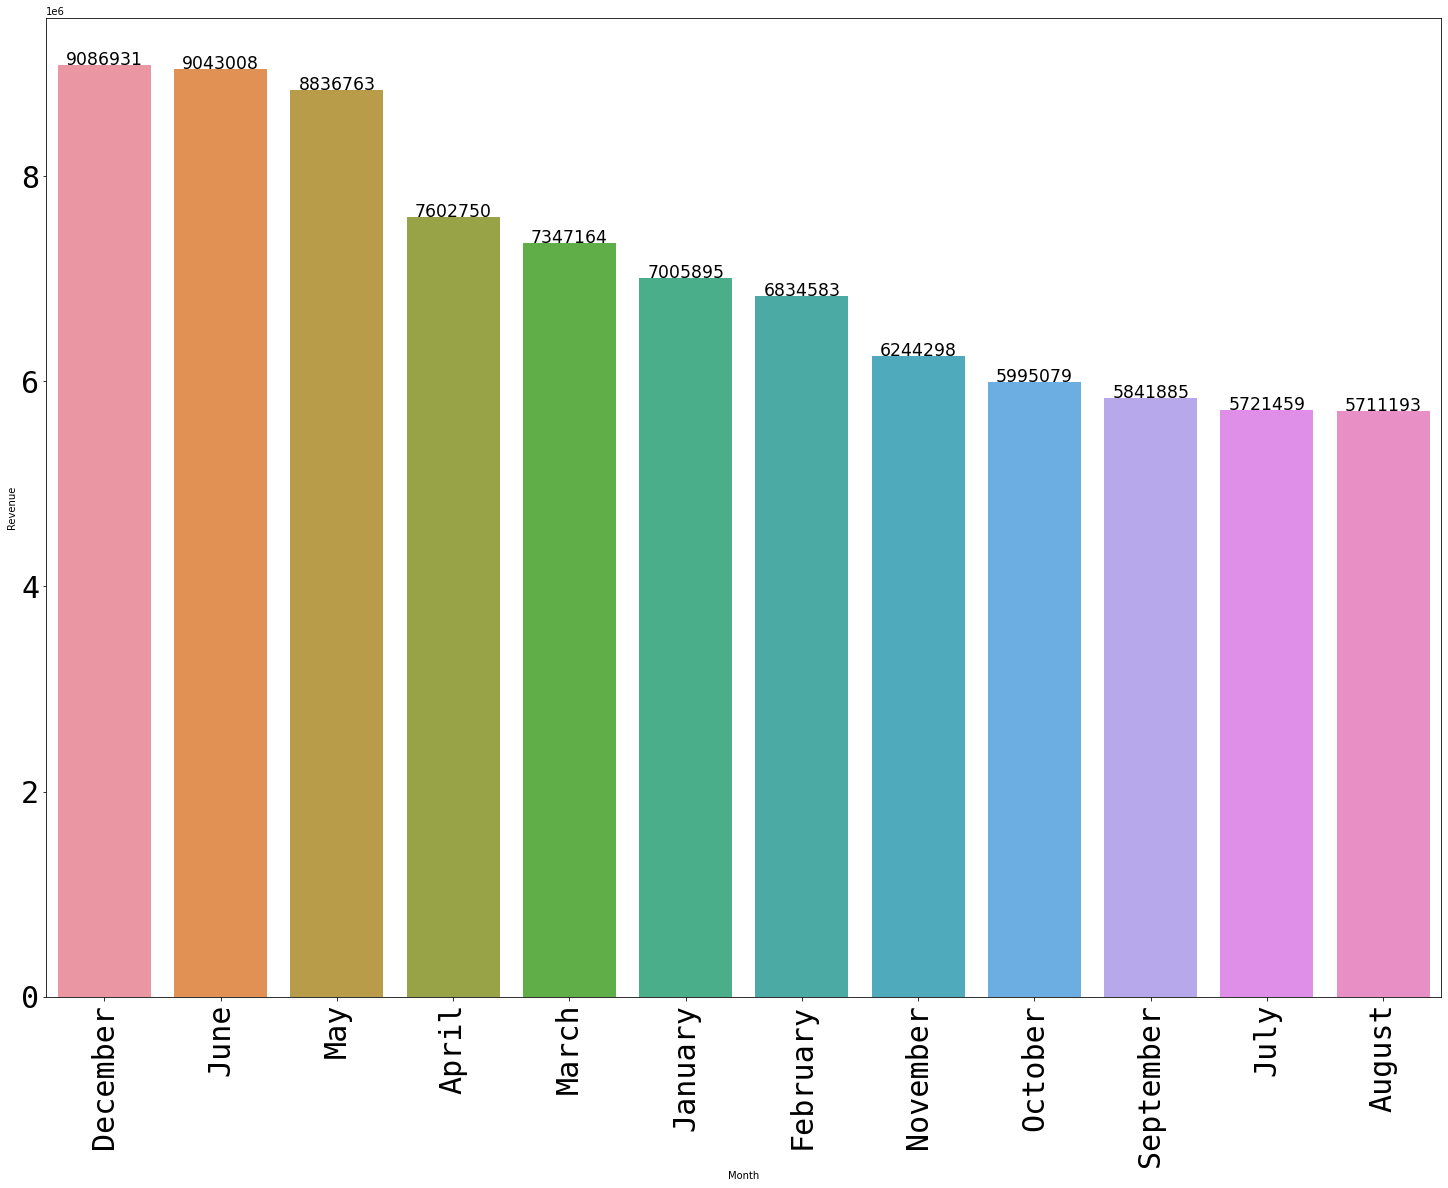

In [47]:
plt.figure(figsize = (25,18))
ax=sns.barplot(x='Month', y='Revenue', data=TA1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(fontsize=30, fontname='monospace')
plt.yticks(fontsize=30, fontname='monospace');
for index, row in TA1.iterrows():
    ax.text(row.name, row.Revenue, round(row.Revenue, 2), ha="center", fontsize='xx-large')

In [48]:
#Most of our customer are adults from the age(35-64)
Age = sales.Age_Group.nunique()
Age

4

In [49]:
sales2 = sales.groupby(["Age_Group"]).sum().sort_values('Revenue',ascending=False)
sales2

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Age_Group,,,,,,,,,
Adults (35-64),869000,112454439,2483692,672417,14977544,25410250,16321582,26262571,42584153
Young Adults (25-34),606480,77863422,1149966,446875,11186598,18923836,11386761,19268853,30655614
Youth (<25),283906,35911415,375252,216147,3985222,6750192,4374592,7348607,11723199
Seniors (64+),11408,1470639,51254,9877,64748,114070,138165,169877,308042


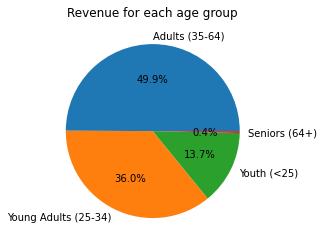

In [50]:
labels = ['Adults (35-64)', 'Young Adults (25-34)', 'Youth (<25)','Seniors (64+)']
ax = plt.pie(sales2.Revenue, labels=labels, autopct='%1.1f%%')
plt.title("Revenue for each age group");

<AxesSubplot:>

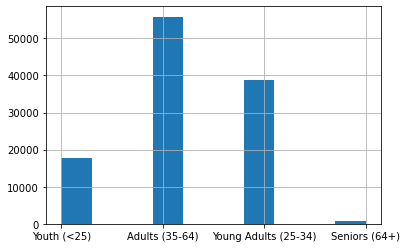

In [51]:
sales['Age_Group'].hist()


In [52]:
sales.Order_Quantity.unique()

array([ 8, 23, 20,  4,  5,  2, 22, 21,  7,  1,  6,  9,  3, 24, 25, 10, 11,
       12, 14, 28, 27, 15, 13, 17, 16, 30, 29, 26, 19, 18, 31, 32])

<AxesSubplot:>

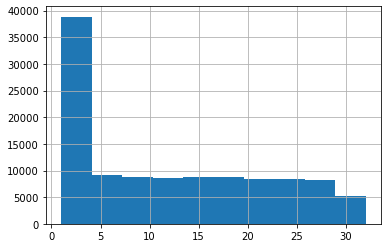

In [53]:
# the majority of our unit per sale is between 1-5 pieces 
sales.Order_Quantity.hist()

<AxesSubplot:xlabel='Customer_Gender', ylabel='count'>

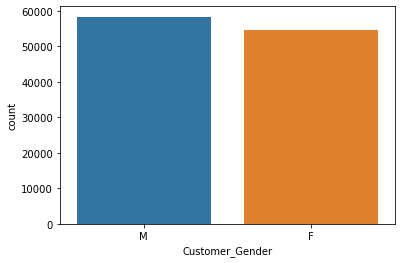

In [54]:
#The Gender distribution for our sale is about equal among male and female
# with male being slightly higher
sns.countplot(x='Customer_Gender', data=sales)

In [55]:
sales.Product.nunique()

130

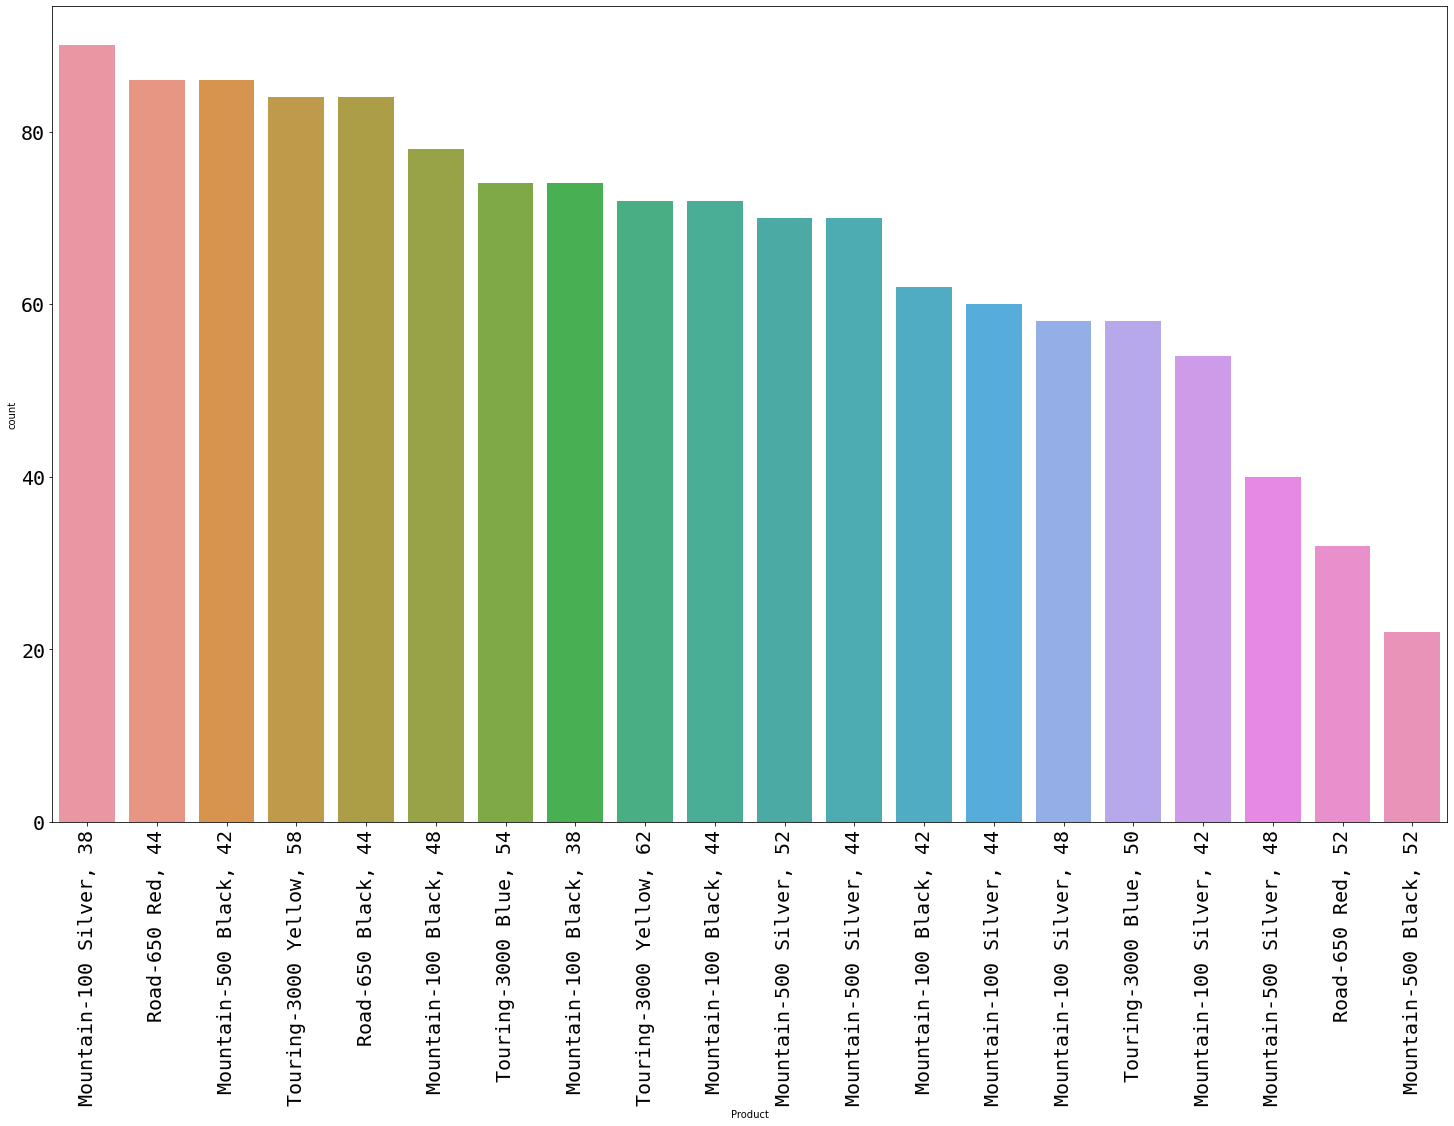

In [56]:
plt.figure(figsize = (25,15))
ax = sns.countplot(data=sales, x='Product', order=sales.Product.value_counts().iloc[110:130].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(fontsize=20, fontname='monospace')
plt.yticks(fontsize=20, fontname='monospace');


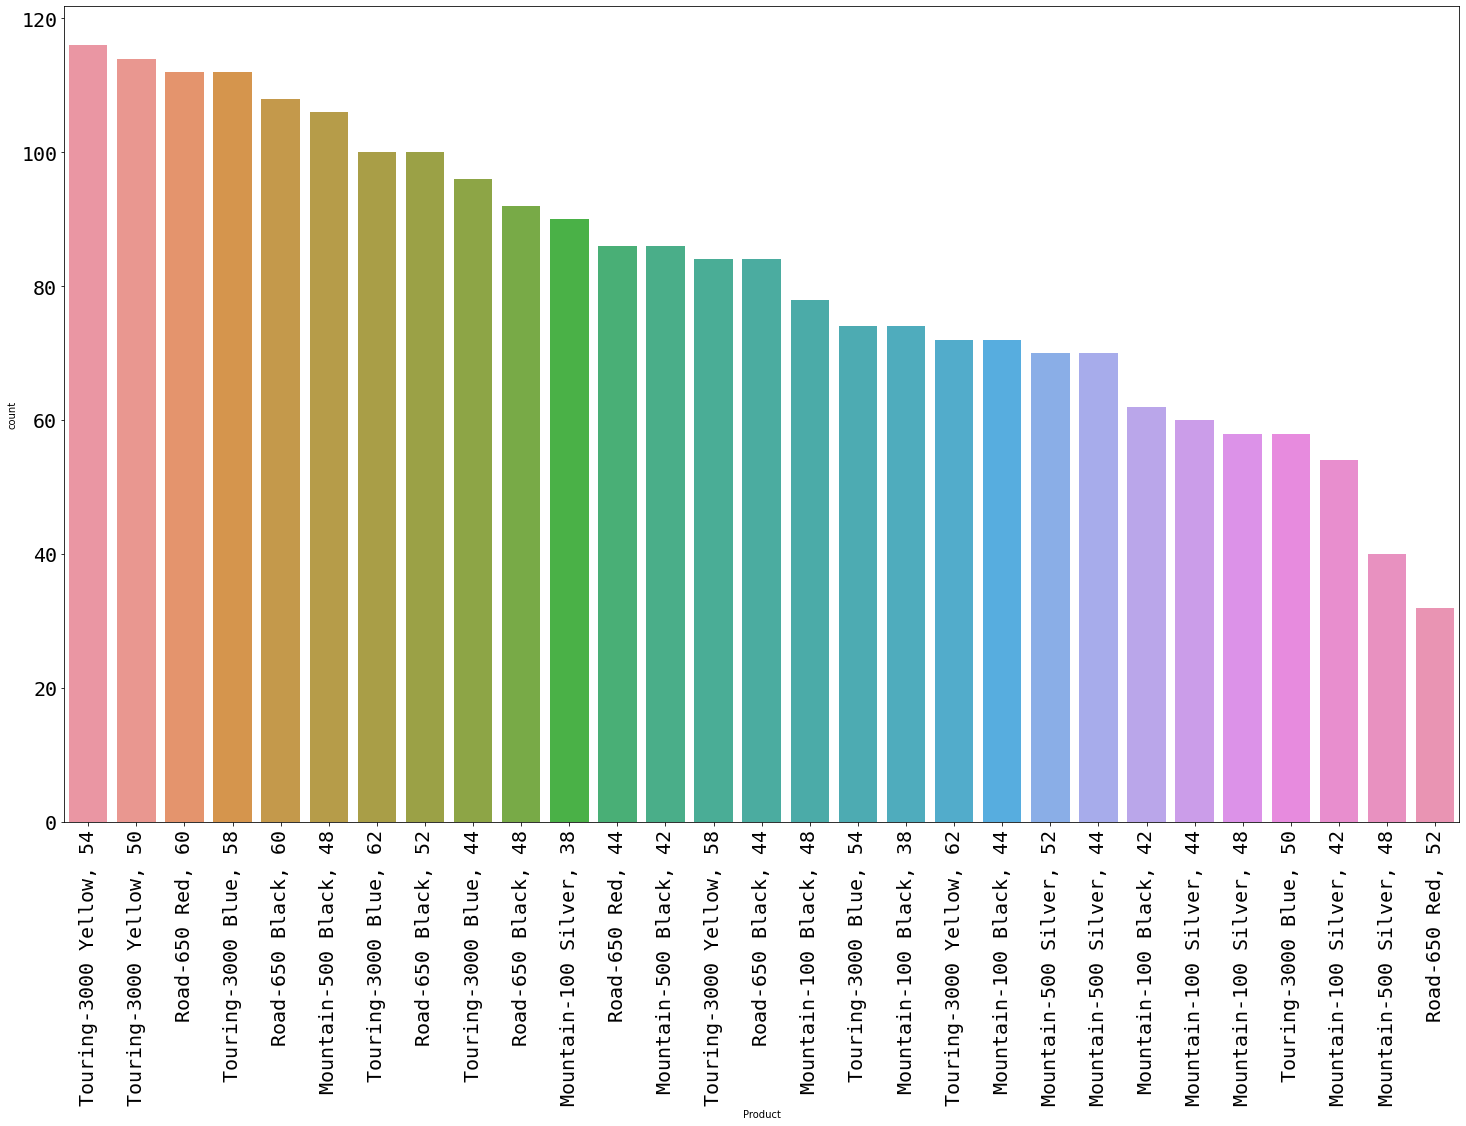

In [60]:
plt.figure(figsize = (25,15))
ax = sns.countplot(data=sales, x='Product', order=sales.Product.value_counts().iloc[100:-1].index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xticks(fontsize=20, fontname='monospace')
plt.yticks(fontsize=20, fontname='monospace');


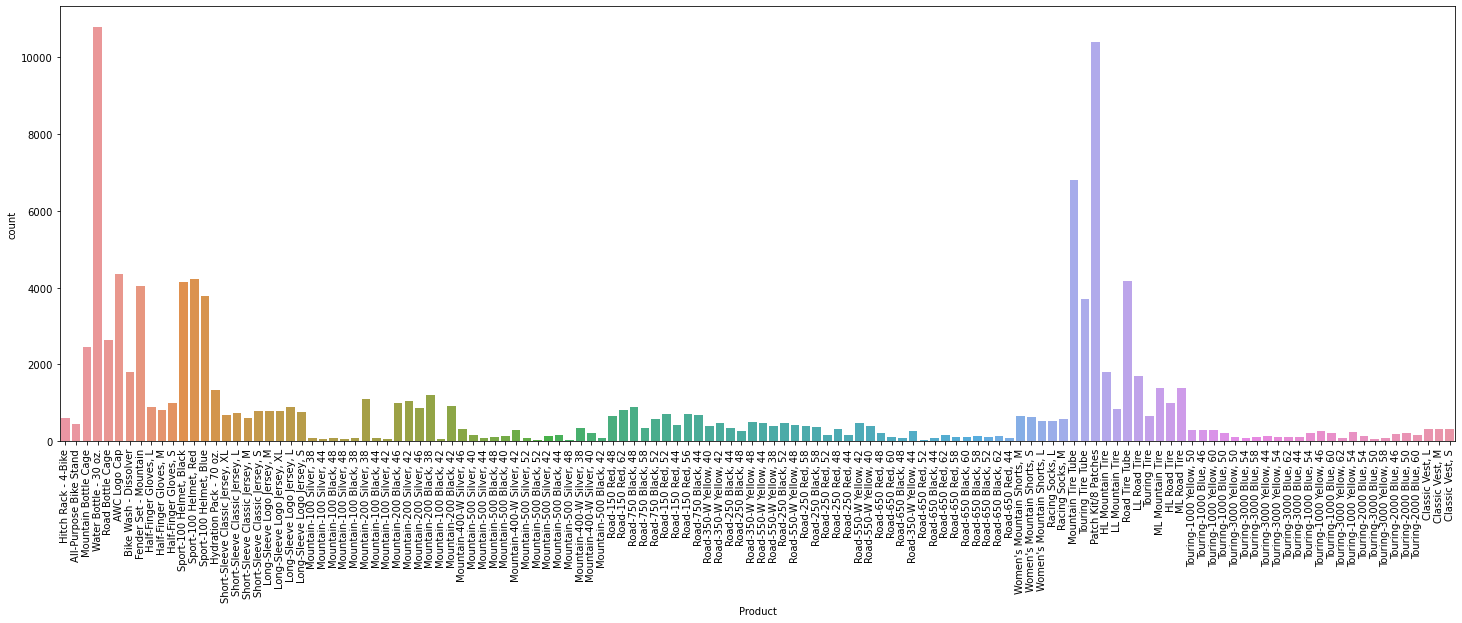

In [58]:
# next plot and also our following table shows the highest order quantity
# per product

plt.figure(figsize = (25,8))
ax = sns.countplot(data=sales, x='Product')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


In [59]:
# next we can see the highest order quantity per product, the highest quantity item sold is 'wather bottle'
sales_per_item = sales.groupby(["Product"]).sum().sort_values('Order_Quantity',ascending=False)
sales_per_item

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Product,,,,,,,,,
Water Bottle - 30 oz.,166330,21745396,386366,164086,21588,53970,417843,328172,746015
Patch Kit/8 Patches,164318,20983772,373268,157583,10416,20832,126280,157583,283863
Mountain Tire Tube,105148,13731376,244996,102792,13632,34080,264355,205584,469939
AWC Logo Cap,68040,8779602,154054,67316,30506,39222,78008,471212,549220
"Sport-100 Helmet, Red",66878,8501462,149406,63663,54860,147700,1191402,827619,2019021
...,...,...,...,...,...,...,...,...,...
"Mountain-100 Black, 42",994,124871,2238,73,117676,209250,71911,138554,210465
"Touring-3000 Blue, 50",794,116846,2130,70,26738,43036,13424,32270,45694
"Mountain-500 Silver, 48",726,80567,1504,52,12320,22600,9778,16016,25794


In [96]:
# I have created another columns that shows the profit margin of each
# individual products and also the plot to showcase our work
# 'road tire tube' has the highest profit margin and 'short sleeve classic jersey' has the lowest profit margin
sales_per_item['profit_margin'] = (sales_per_item['Revenue']-sales_per_item['Cost'])/sales_per_item['Revenue']*100
sales_per_item.sort_values('profit_margin', ascending=False)

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,profit_margin
Product,,,,,,,,,,
Road Tire Tube,63324,8412806,144166,62296,4176,16704,164182,62296,226478,72.493576
"Racing Socks, L",8556,1071734,19044,8107,1596,4788,42268,24321,66589,63.475949
"Racing Socks, M",9436,1180544,20924,9529,1758,5274,49084,28587,77671,63.194757
Road Bottle Cage,41180,5318532,92636,40164,7920,23760,203754,120492,324246,62.839326
Fender Set - Mountain,62778,8122716,148222,62118,32256,88704,749041,496944,1245985,60.116374
...,...,...,...,...,...,...,...,...,...,...
AWC Logo Cap,68040,8779602,154054,67316,30506,39222,78008,471212,549220,14.203416
"Short-Sleeve Classic Jersey, S",11762,1575382,27438,11544,32844,42228,74389,484848,559237,13.301874
"Short-Sleeve Classic Jersey, XL",9988,1349736,23528,9244,28140,36180,58878,388248,447126,13.168100


In [97]:
sales_per_item = sales_per_item.reset_index()

In [98]:
sales_per_item

,Product,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,profit_margin
0,Water Bottle - 30 oz.,166330,21745396,386366,164086,21588,53970,417843,328172,746015,56.010000
1,Patch Kit/8 Patches,164318,20983772,373268,157583,10416,20832,126280,157583,283863,44.486249
2,Mountain Tire Tube,105148,13731376,244996,102792,13632,34080,264355,205584,469939,56.253046
3,AWC Logo Cap,68040,8779602,154054,67316,30506,39222,78008,471212,549220,14.203416
4,"Sport-100 Helmet, Red",66878,8501462,149406,63663,54860,147700,1191402,827619,2019021,59.008896
...,...,...,...,...,...,...,...,...,...,...,...
125,"Mountain-100 Black, 42",994,124871,2238,73,117676,209250,71911,138554,210465,34.167676
126,"Touring-3000 Blue, 50",794,116846,2130,70,26738,43036,13424,32270,45694,29.378037
127,"Mountain-500 Silver, 48",726,80567,1504,52,12320,22600,9778,16016,25794,37.908041
128,"Road-650 Red, 52",434,64427,1084,52,15584,25056,9345,25324,34669,26.954916


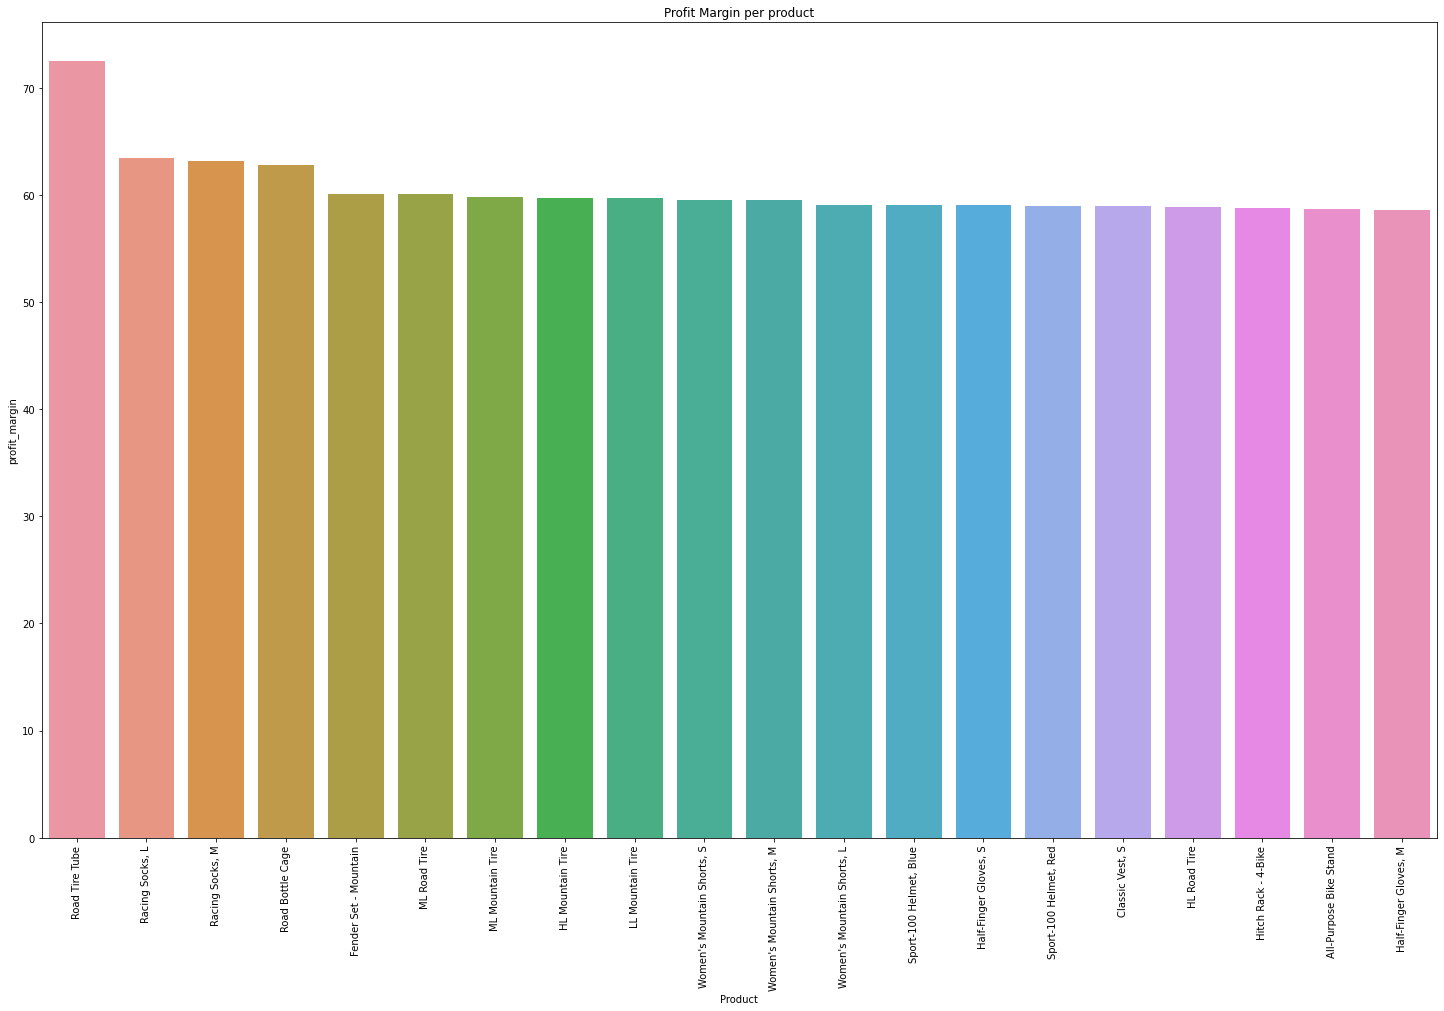

In [99]:
plt.figure(figsize = (25,15))
ax = sns.barplot(data=sales_per_item, x='Product', y='profit_margin',  order=sales_per_item.sort_values('profit_margin', ascending=False).iloc[:20].Product)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Profit Margin per product");

In [36]:
plt.figure(figsize = (33,8))

ax=sns.barplot(x='Product', y='profit_margin', data=sales_per_item, order=sales_per_item.sort_values('profit_margin', ascending=False).iloc[100:].Product)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);




NameError: name 'sales_per_item' is not defined

<Figure size 2376x576 with 0 Axes>

In [101]:
#next we find the revenue per product category, there are three categories


sales1= sales.groupby(['Product_Category']).sum().sort_values('Revenue', ascending=False)
sales1.shape

(3, 9)

In [102]:
sales1 = sales1.iloc[:, 6:9]
sales1

,Profit,Cost,Revenue
Product_Category,,,
Bikes,20519276,41262858,61782134
Accessories,8862377,6255615,15117992
Clothing,2839447,5531435,8370882


In [114]:
#Bikes make up for 63% of company's profit, although the profit margin is 33%
#Bikes make up for 72% of our revenue
#the profit margin column shows that the Accessories has the highest
#profit margin amongst all of the categories
sales1['profit_per_category'] = sales1['Profit']/sales1['Profit'].sum()*100
sales1['revenue_per_category'] = sales1['Revenue']/sales1['Revenue'].sum()*100
sales1['profit_margin'] = (sales1['Revenue'] - sales1['Cost'])/sales1['Revenue'] *100
sales1

,Profit,Cost,Revenue,profit_per_category,revenue_per_category,profit_margin
Product_Category,,,,,,
Bikes,20519276,41262858,61782134,63.682730,72.453857,33.212313
Accessories,8862377,6255615,15117992,27.504887,17.729346,58.621390
Clothing,2839447,5531435,8370882,8.812384,9.816797,33.920524


In [122]:
sales1.columns

Index(['Profit', 'Cost', 'Revenue', 'profit_per_category',
       'revenue_per_category', 'profit_margin'],
      dtype='object')

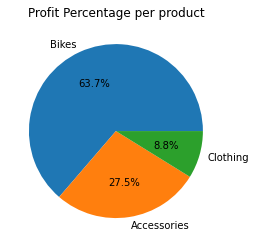

In [119]:
labels = ['Bikes', 'Accessories', 'Clothing' ]
ax = plt.pie(sales1.profit_per_category, labels=labels, autopct='%1.1f%%')
plt.title("Profit Percentage per product");

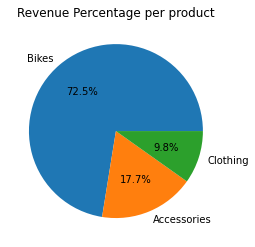

In [116]:
labels = ['Bikes', 'Accessories', 'Clothing' ]
ax = plt.pie(sales1.revenue_per_category, labels=labels, autopct='%1.1f%%')
plt.title("Revenue Percentage per product");

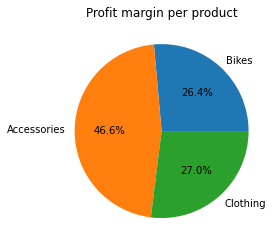

In [117]:
labels = ['Bikes', 'Accessories', 'Clothing' ]
ax = plt.pie(sales1.profit_margin, labels=labels, autopct='%1.1f%%')
plt.title("Profit margin per product");

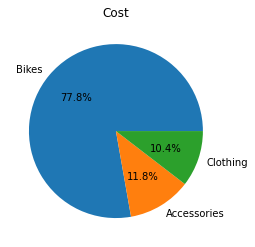

In [124]:
labels = ['Bikes', 'Accessories', 'Clothing' ]
ax = plt.pie(sales1.Cost, labels=labels, autopct='%1.1f%%')
plt.title("Cost");

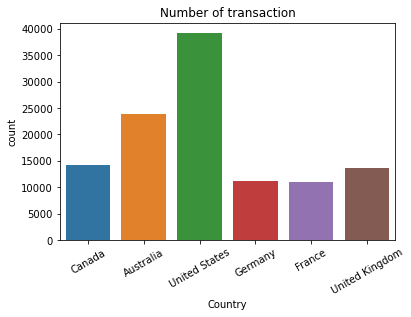

In [125]:
#number of transaction per country, with US being first and Australia is second

ax = sns.countplot(data=sales, x='Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("Number of transaction");

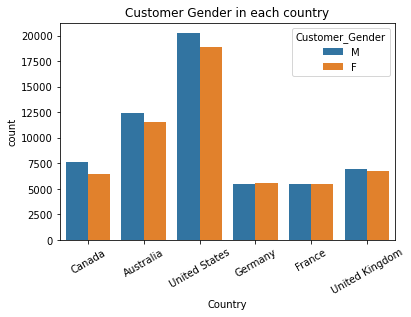

In [128]:
#distribution of gender customer in each country
ax = sns.countplot(data=sales, x='Country',hue='Customer_Gender')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title("Customer Gender in each country");

In [129]:
#calculate the Revenue per country
sales2= sales.groupby(['Country']).sum().sort_values('Revenue', ascending=False)
sales2




,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Country,,,,,,,,,
United States,614706,78977041,1465956,477539,9383978,16045264,11073644,16901903,27975547
Australia,376280,48214357,823014,263585,8714208,14651442,6776030,14526029,21302059
United Kingdom,213584,27436513,484216,157218,3668832,6205596,4413853,6232343,10646196
Germany,172856,22356331,386966,125720,3339196,5637392,3359995,5618601,8978596
France,173590,22154757,386216,128995,3213340,5416258,2880282,5552590,8432872
Canada,219778,28560916,513796,192259,1894558,3242396,3717296,4218442,7935738


In [130]:
sales2 = sales2.iloc[:, 3:]
sales2

,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Country,,,,,,
United States,477539,9383978,16045264,11073644,16901903,27975547
Australia,263585,8714208,14651442,6776030,14526029,21302059
United Kingdom,157218,3668832,6205596,4413853,6232343,10646196
Germany,125720,3339196,5637392,3359995,5618601,8978596
France,128995,3213340,5416258,2880282,5552590,8432872
Canada,192259,1894558,3242396,3717296,4218442,7935738


In [131]:
# find the revenue percentage for each country
# find the profit percentage for each country
sales2['revenue_percentage'] = sales2['Revenue']/sales2['Revenue'].sum()*100
sales2['profit_percentage'] = sales2['Profit']/sales2['Profit'].sum()*100
sales2

/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,revenue_percentage,profit_percentage
Country,,,,,,,,
United States,477539,9383978,16045264,11073644,16901903,27975547,32.807806,34.367678
Australia,263585,8714208,14651442,6776030,14526029,21302059,24.981596,21.029791
United Kingdom,157218,3668832,6205596,4413853,6232343,10646196,12.485130,13.698642
Germany,125720,3339196,5637392,3359995,5618601,8978596,10.529483,10.427934
France,128995,3213340,5416258,2880282,5552590,8432872,9.889495,8.939118
Canada,192259,1894558,3242396,3717296,4218442,7935738,9.306490,11.536838


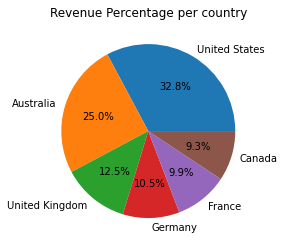

In [132]:
labels = ['United States', 'Australia', 'United Kingdom', 'Germany', 'France', 'Canada' ]

fig, axs = plt.subplots(1,1)
ax1 = plt.pie(sales2.revenue_percentage, labels=labels, autopct='%1.1f%%', radius=1, frame=False)
plt.title("Revenue Percentage per country");


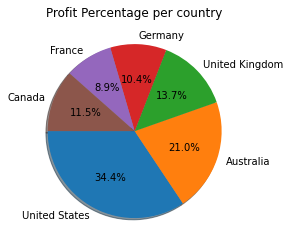

In [133]:
ax2 = plt.pie(sales2.profit_percentage, labels=labels, autopct='%1.1f%%', radius=1, frame=False, 
          shadow = True, startangle = 180)
plt.title("Profit Percentage per country");

In [134]:
#number of sold quantity per sub-category
#we can see that tires and tubes has the highest order quantity
sales3 = sales.groupby(['Sub_Category']).sum().sort_values('Order_Quantity', ascending=False)
sales3


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Sub_Category,,,,,,,,,
Tires and Tubes,533586,68233492,1216082,514051,127060,337926,2727713,1943189,4670902
Bottles and Cages,244942,31983594,570634,241726,39280,102160,810598,598576,1409174
Helmets,191754,24493078,441472,181606,158054,425530,3380203,2360878,5741081
Jerseys,92692,12107442,216978,88125,239532,311652,603568,3510174,4113742
Caps,68026,8779600,154080,67268,30496,39214,77921,470856,548777
Fenders,62840,8122714,148230,62138,32236,88648,748914,496819,1245733
Gloves,42648,5411128,97310,39978,24170,64456,511654,359765,871419
Cleaners,28554,3630264,65560,27574,5414,14418,115891,82930,198821
Shorts,27784,3614040,67546,27168,46644,125580,1034342,706368,1740710


In [135]:
#next we find the profit per sub-category, revenue per sub-category
# and profit margin per sub_category
sales3['profit_per_category'] = sales3['Profit'] /sales3['Profit'].sum()*100
sales3['revenue_per_category'] = sales3['Revenue'] /sales3['Revenue'].sum()*100
sales3['profit_margin'] = (sales3['Revenue'] - sales3['Cost']) / sales3['Revenue'] *100
sales3.sort_values('profit_margin', ascending=False)


,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,profit_per_category,revenue_per_category,profit_margin
Sub_Category,,,,,,,,,,,,
Socks,18052,2260334,40044,17678,3458,10342,93171,54000,147171,0.289161,0.172592,63.307989
Fenders,62840,8122714,148230,62138,32236,88648,748914,496819,1245733,2.324297,1.460910,60.118340
Shorts,27784,3614040,67546,27168,46644,125580,1034342,706368,1740710,3.210139,2.041386,59.420696
Helmets,191754,24493078,441472,181606,158054,425530,3380203,2360878,5741081,10.490651,6.732747,58.877466
Bike Racks,9598,1192606,22326,4741,26640,71040,304455,213345,517800,0.944893,0.607240,58.797798
Gloves,42648,5411128,97310,39978,24170,64456,511654,359765,871419,1.587947,1.021941,58.715038
Bike Stands,7238,918602,16700,2412,26848,72348,201935,142140,344075,0.626717,0.403508,58.689239
Tires and Tubes,533586,68233492,1216082,514051,127060,337926,2727713,1943189,4670902,8.465611,5.477714,58.397993
Cleaners,28554,3630264,65560,27574,5414,14418,115891,82930,198821,0.359674,0.233164,58.289114


In [136]:
sales3 = sales3.reset_index()
sales3

,Sub_Category,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,profit_per_category,revenue_per_category,profit_margin
0,Tires and Tubes,533586,68233492,1216082,514051,127060,337926,2727713,1943189,4670902,8.465611,5.477714,58.397993
1,Bottles and Cages,244942,31983594,570634,241726,39280,102160,810598,598576,1409174,2.515737,1.652583,57.522918
2,Helmets,191754,24493078,441472,181606,158054,425530,3380203,2360878,5741081,10.490651,6.732747,58.877466
3,Jerseys,92692,12107442,216978,88125,239532,311652,603568,3510174,4113742,1.873207,4.824315,14.671995
4,Caps,68026,8779600,154080,67268,30496,39214,77921,470856,548777,0.241832,0.643568,14.199028
5,Fenders,62840,8122714,148230,62138,32236,88648,748914,496819,1245733,2.324297,1.460910,60.118340
6,Gloves,42648,5411128,97310,39978,24170,64456,511654,359765,871419,1.587947,1.021941,58.715038
7,Cleaners,28554,3630264,65560,27574,5414,14418,115891,82930,198821,0.359674,0.233164,58.289114
8,Shorts,27784,3614040,67546,27168,46644,125580,1034342,706368,1740710,3.210139,2.041386,59.420696
9,Hydration Packs,20924,2687400,49222,19914,27998,73330,572668,417738,990406,1.777307,1.161480,57.821540


Text(0, 0.5, 'kw')

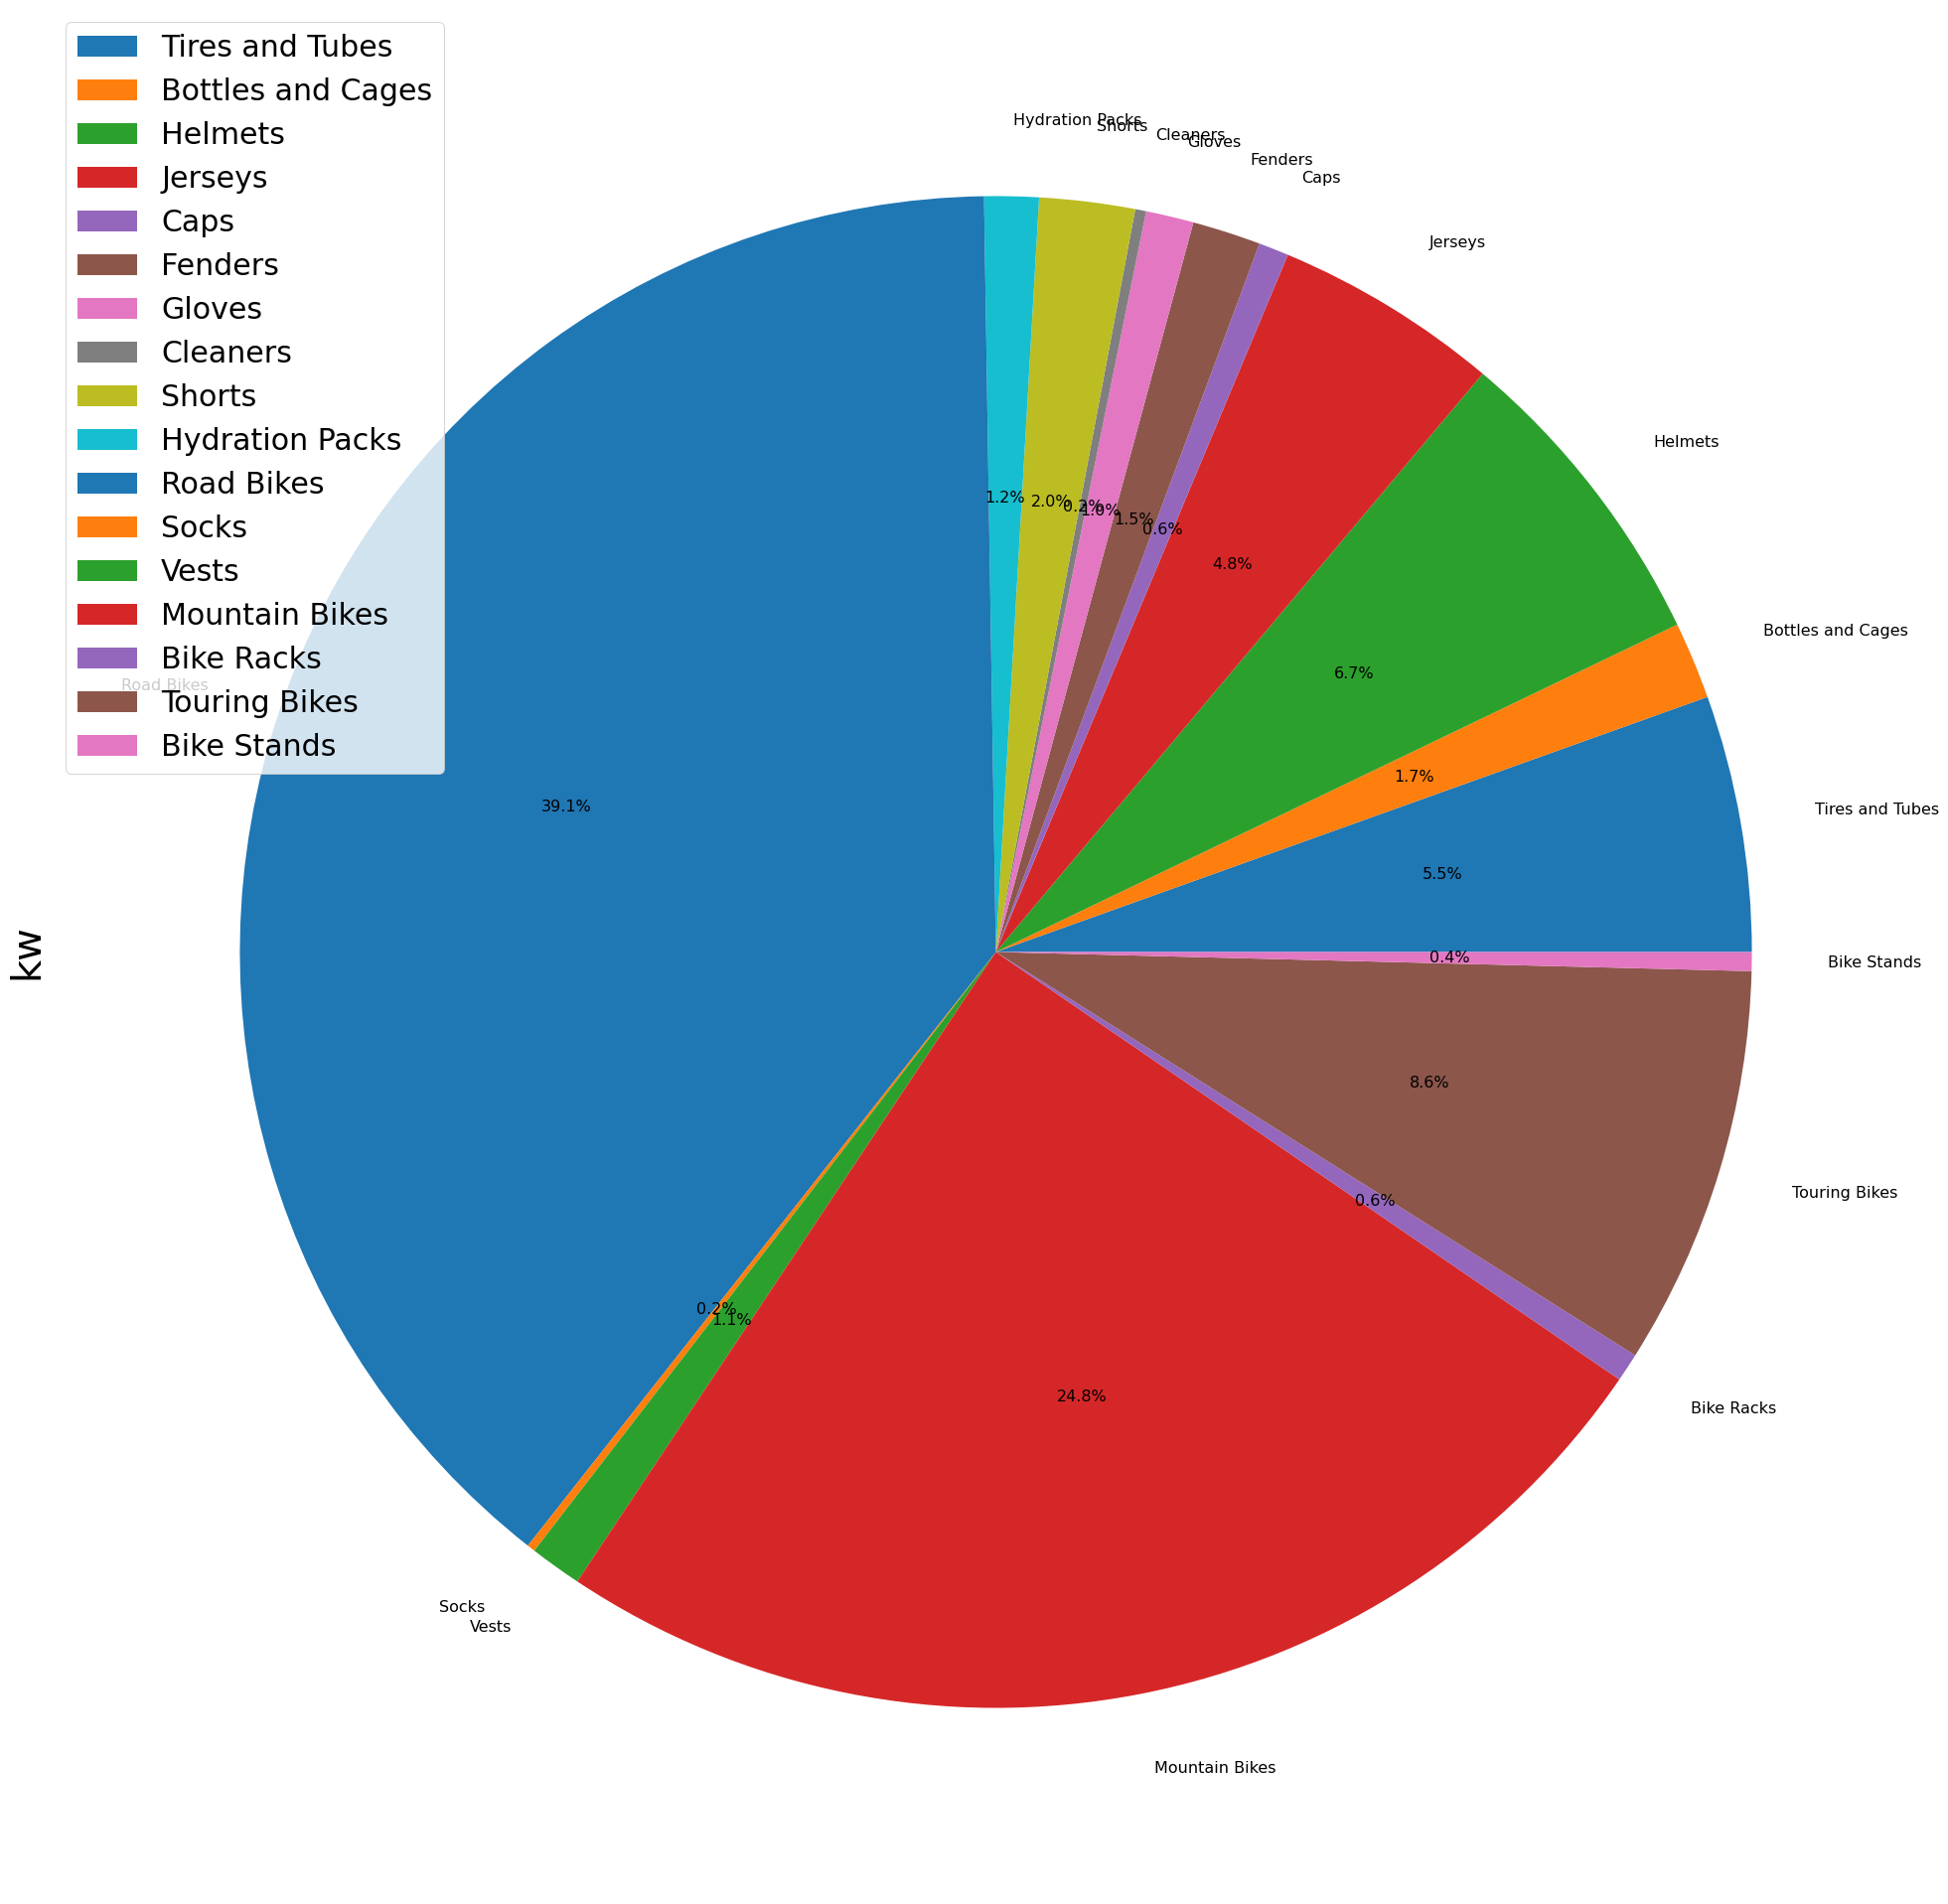

In [144]:
ax1 = sales3.plot(kind='pie', y='revenue_per_category', figsize=(35,35), autopct='%1.1f%%', fontsize=16, labels=sales3['Sub_Category'])
ax1.legend(loc=2,fontsize=30)
ax1.set_ylabel('kw',fontdict={'fontsize':40})

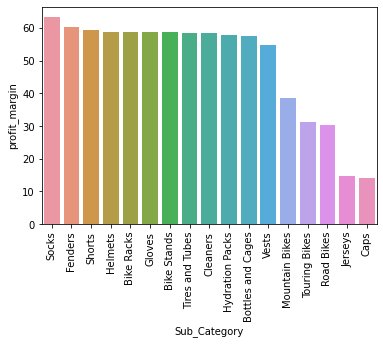

In [130]:
#profit margin per sub-category shows socks has the highest profit
# and caps has the lowest ones
ax=sns.barplot(x='Sub_Category', y='profit_margin', data=sales3, order=sales3.sort_values('profit_margin', ascending=False).Sub_Category)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

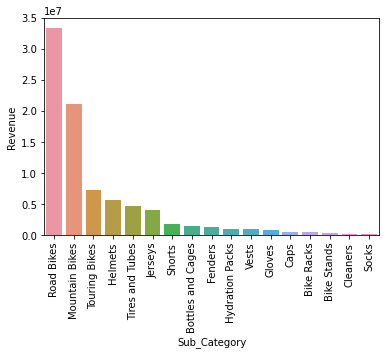

In [33]:
#Revenue per sub-category
ax=sns.barplot(x='Sub_Category', y='Revenue', data=sales3, order=sales3.sort_values('Revenue', ascending=False).Sub_Category)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [34]:
table = sales[['Country', 'Customer_Gender','Product_Category', 'Order_Quantity' ]]

table




,Country,Customer_Gender,Product_Category,Order_Quantity
0,Canada,M,Accessories,8
1,Canada,M,Accessories,8
2,Australia,M,Accessories,23
3,Australia,M,Accessories,20
4,Australia,F,Accessories,4
...,...,...,...,...
113031,United Kingdom,M,Clothing,3
113032,Australia,M,Clothing,22
113033,Australia,M,Clothing,22
113034,France,F,Clothing,24


In [35]:
#Next we want to see the distribution of order quantity in different product category among male and female in different countries 
# we use pivot_table for this task
table1 = pd.pivot_table(table, columns=['Product_Category'], index=['Country', 'Customer_Gender'],  aggfunc=np.sum)
table1

Order_Quantity               
Product_Category                  Accessories Bikes Clothing
Country        Customer_Gender                              
Australia      F                        94982  4999    24862
               M                       108080  5157    25505
Canada         F                        70061  1096    16063
               M                        83811  1149    20079
France         F                        52021  1810    11470
               M                        49412  2002    12280
Germany        F                        48938  2236    10792
               M                        49744  1937    12073
United Kingdom F                        61784  2338    14834
               M                        60580  2495    15187
United States  F                       179301  5570    42576
               M                       195448  5622    49022

In [59]:
sales1 = sales[['Country', 'State', 'Revenue', 'Product_Category']]

columns1 = ['Country', 'State', 'Revenue', 'Product_Category']
sales1

,Country,State,Revenue,Product_Category
0,Canada,British Columbia,950,Accessories
1,Canada,British Columbia,950,Accessories
2,Australia,New South Wales,2401,Accessories
3,Australia,New South Wales,2088,Accessories
4,Australia,New South Wales,418,Accessories
...,...,...,...,...
113031,United Kingdom,England,184,Clothing
113032,Australia,Queensland,1183,Clothing
113033,Australia,Queensland,1183,Clothing
113034,France,Seine (Paris),1260,Clothing


In [64]:
#Revenue base on the state of each country, California makes the highest Revenue and England makes 
#the second in the list

table2 = sales1.groupby(['State', 'Country']).sum().sort_values('Revenue', ascending=False)

table2

,,Revenue
State,Country,
California,United States,17672620
England,United Kingdom,10646196
New South Wales,Australia,9203495
British Columbia,Canada,7877890
Washington,United States,6741510
Queensland,Australia,5066267
Victoria,Australia,5054839
Oregon,United States,3450410
Hessen,Germany,2073391


In [41]:
table1 = table1.stack()

In [42]:
table1 = table1.reset_index()

In [43]:
# in this section, I diveded each country's dataset into it's own
# to visualize the
# distribution and also to find the percentage of each country's demand
# This will help us, identify the product demand/category for each country 
# among male and female customers, so we can predict our future sales
# for each category per country
Australia = table1[table1['Country'] == 'Australia']
Canada = table1[table1['Country'] == 'Canada']
France = table1[table1['Country'] == 'France']
Germany = table1[table1['Country'] == 'Germany']
United_Kingdom = table1[table1['Country'] == 'United Kingdom']
United_States = table1[table1['Country'] == 'United States']

In [44]:
Australia["percentage"] = Australia['Order_Quantity']/Australia['Order_Quantity'].sum()*100
Canada["percentage"] = Canada['Order_Quantity']/Canada['Order_Quantity'].sum()*100
France["percentage"] = France['Order_Quantity']/France['Order_Quantity'].sum()*100
Germany["percentage"] = Germany['Order_Quantity']/Germany['Order_Quantity'].sum()*100
United_Kingdom["percentage"] = United_Kingdom['Order_Quantity']/United_Kingdom['Order_Quantity'].sum()*100
United_States["percentage"] = United_States['Order_Quantity']/United_States['Order_Quantity'].sum()*100

/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sima/opt/anaconda3/envs/snowflakes/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [45]:
Australia


,Country,Customer_Gender,Product_Category,Order_Quantity,percentage
0,Australia,F,Accessories,94982,36.034676
1,Australia,F,Bikes,4999,1.896542
2,Australia,F,Clothing,24862,9.432251
3,Australia,M,Accessories,108080,41.003851
4,Australia,M,Bikes,5157,1.956485
5,Australia,M,Clothing,25505,9.676196


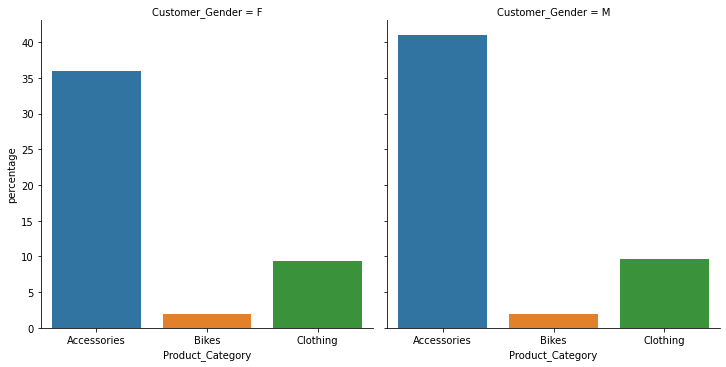

In [231]:
A = sns.catplot(x="Product_Category", y="percentage", col="Customer_Gender",
                 data=Australia, kind='bar')

In [232]:
Canada

,Country,Customer_Gender,Product_Category,Order_Quantity,percentage
6,Canada,F,Accessories,70061,36.440947
7,Canada,F,Bikes,1096,0.570064
8,Canada,F,Clothing,16063,8.354875
9,Canada,M,Accessories,83811,43.592758
10,Canada,M,Bikes,1149,0.597631
11,Canada,M,Clothing,20079,10.443724


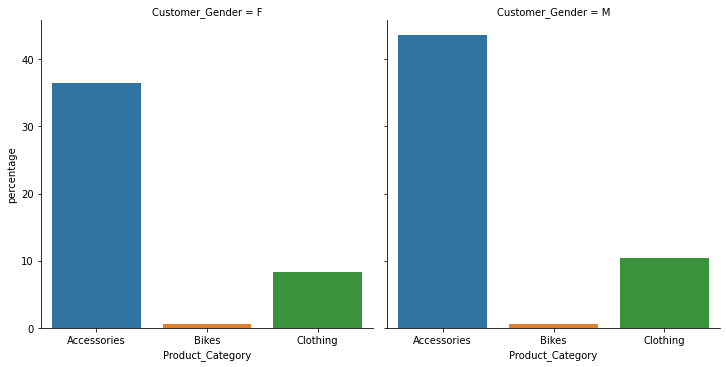

In [233]:
C = sns.catplot(x="Product_Category", y="percentage", col="Customer_Gender",
                 data=Canada, kind='bar')

In [234]:
France

,Country,Customer_Gender,Product_Category,Order_Quantity,percentage
12,France,F,Accessories,52021,40.327920
13,France,F,Bikes,1810,1.403155
14,France,F,Clothing,11470,8.891818
15,France,M,Accessories,49412,38.305361
16,France,M,Bikes,2002,1.551998
17,France,M,Clothing,12280,9.519749


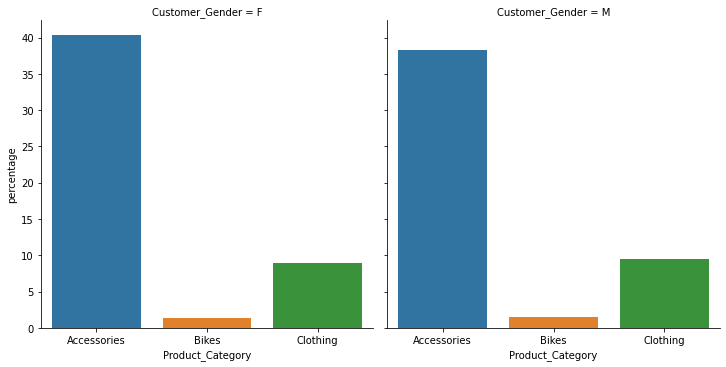

In [235]:


F = sns.catplot(x="Product_Category", y="percentage", col="Customer_Gender",
                 data=France, kind='bar')

In [236]:
Germany

,Country,Customer_Gender,Product_Category,Order_Quantity,percentage
18,Germany,F,Accessories,48938,38.926185
19,Germany,F,Bikes,2236,1.778556
20,Germany,F,Clothing,10792,8.584155
21,Germany,M,Accessories,49744,39.567292
22,Germany,M,Bikes,1937,1.540725
23,Germany,M,Clothing,12073,9.603086


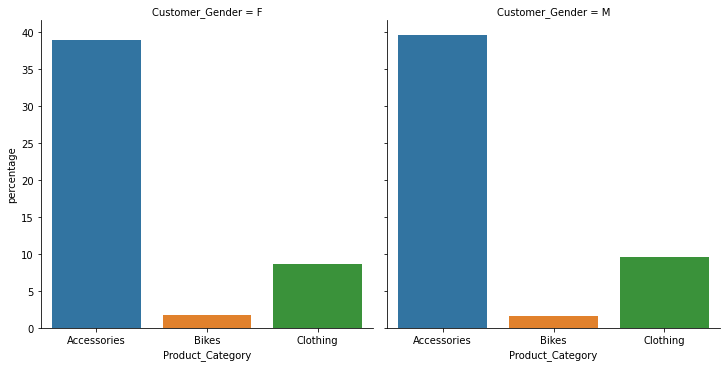

In [237]:


G = sns.catplot(x="Product_Category", y="percentage", col="Customer_Gender",
                 data=Germany, kind='bar')

In [238]:
United_Kingdom

,Country,Customer_Gender,Product_Category,Order_Quantity,percentage
24,United Kingdom,F,Accessories,61784,39.298299
25,United Kingdom,F,Bikes,2338,1.487107
26,United Kingdom,F,Clothing,14834,9.435306
27,United Kingdom,M,Accessories,60580,38.532484
28,United Kingdom,M,Bikes,2495,1.586968
29,United Kingdom,M,Clothing,15187,9.659835


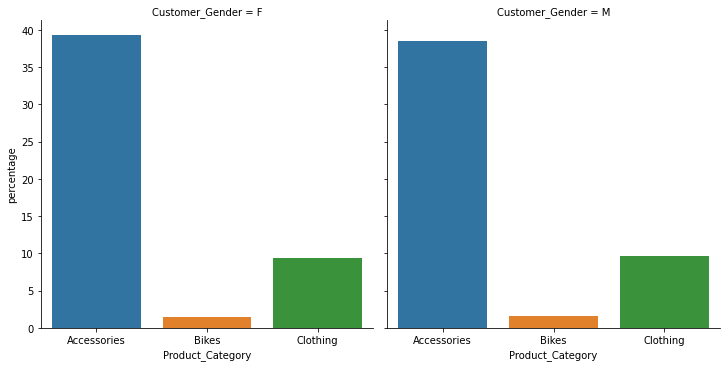

In [239]:


UK = sns.catplot(x="Product_Category", y="percentage", col="Customer_Gender",
                 data=United_Kingdom, kind='bar')

In [240]:
United_States

,Country,Customer_Gender,Product_Category,Order_Quantity,percentage
30,United States,F,Accessories,179301,37.546881
31,United States,F,Bikes,5570,1.166397
32,United States,F,Clothing,42576,8.915712
33,United States,M,Accessories,195448,40.928175
34,United States,M,Bikes,5622,1.177286
35,United States,M,Clothing,49022,10.265549


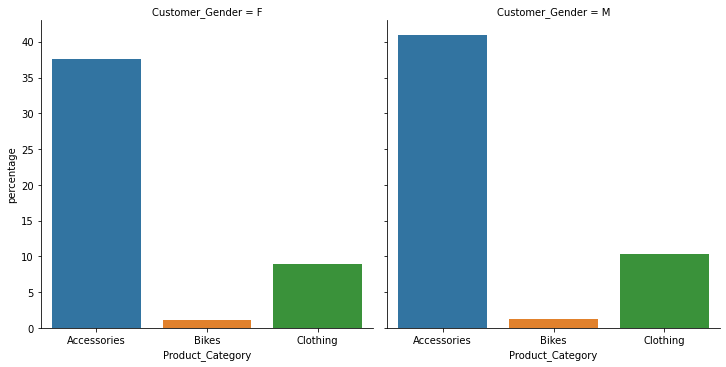

In [241]:


US = sns.catplot(x="Product_Category", y="percentage", col="Customer_Gender",
                 data=United_States, kind='bar')




In [506]:
sales.corr()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


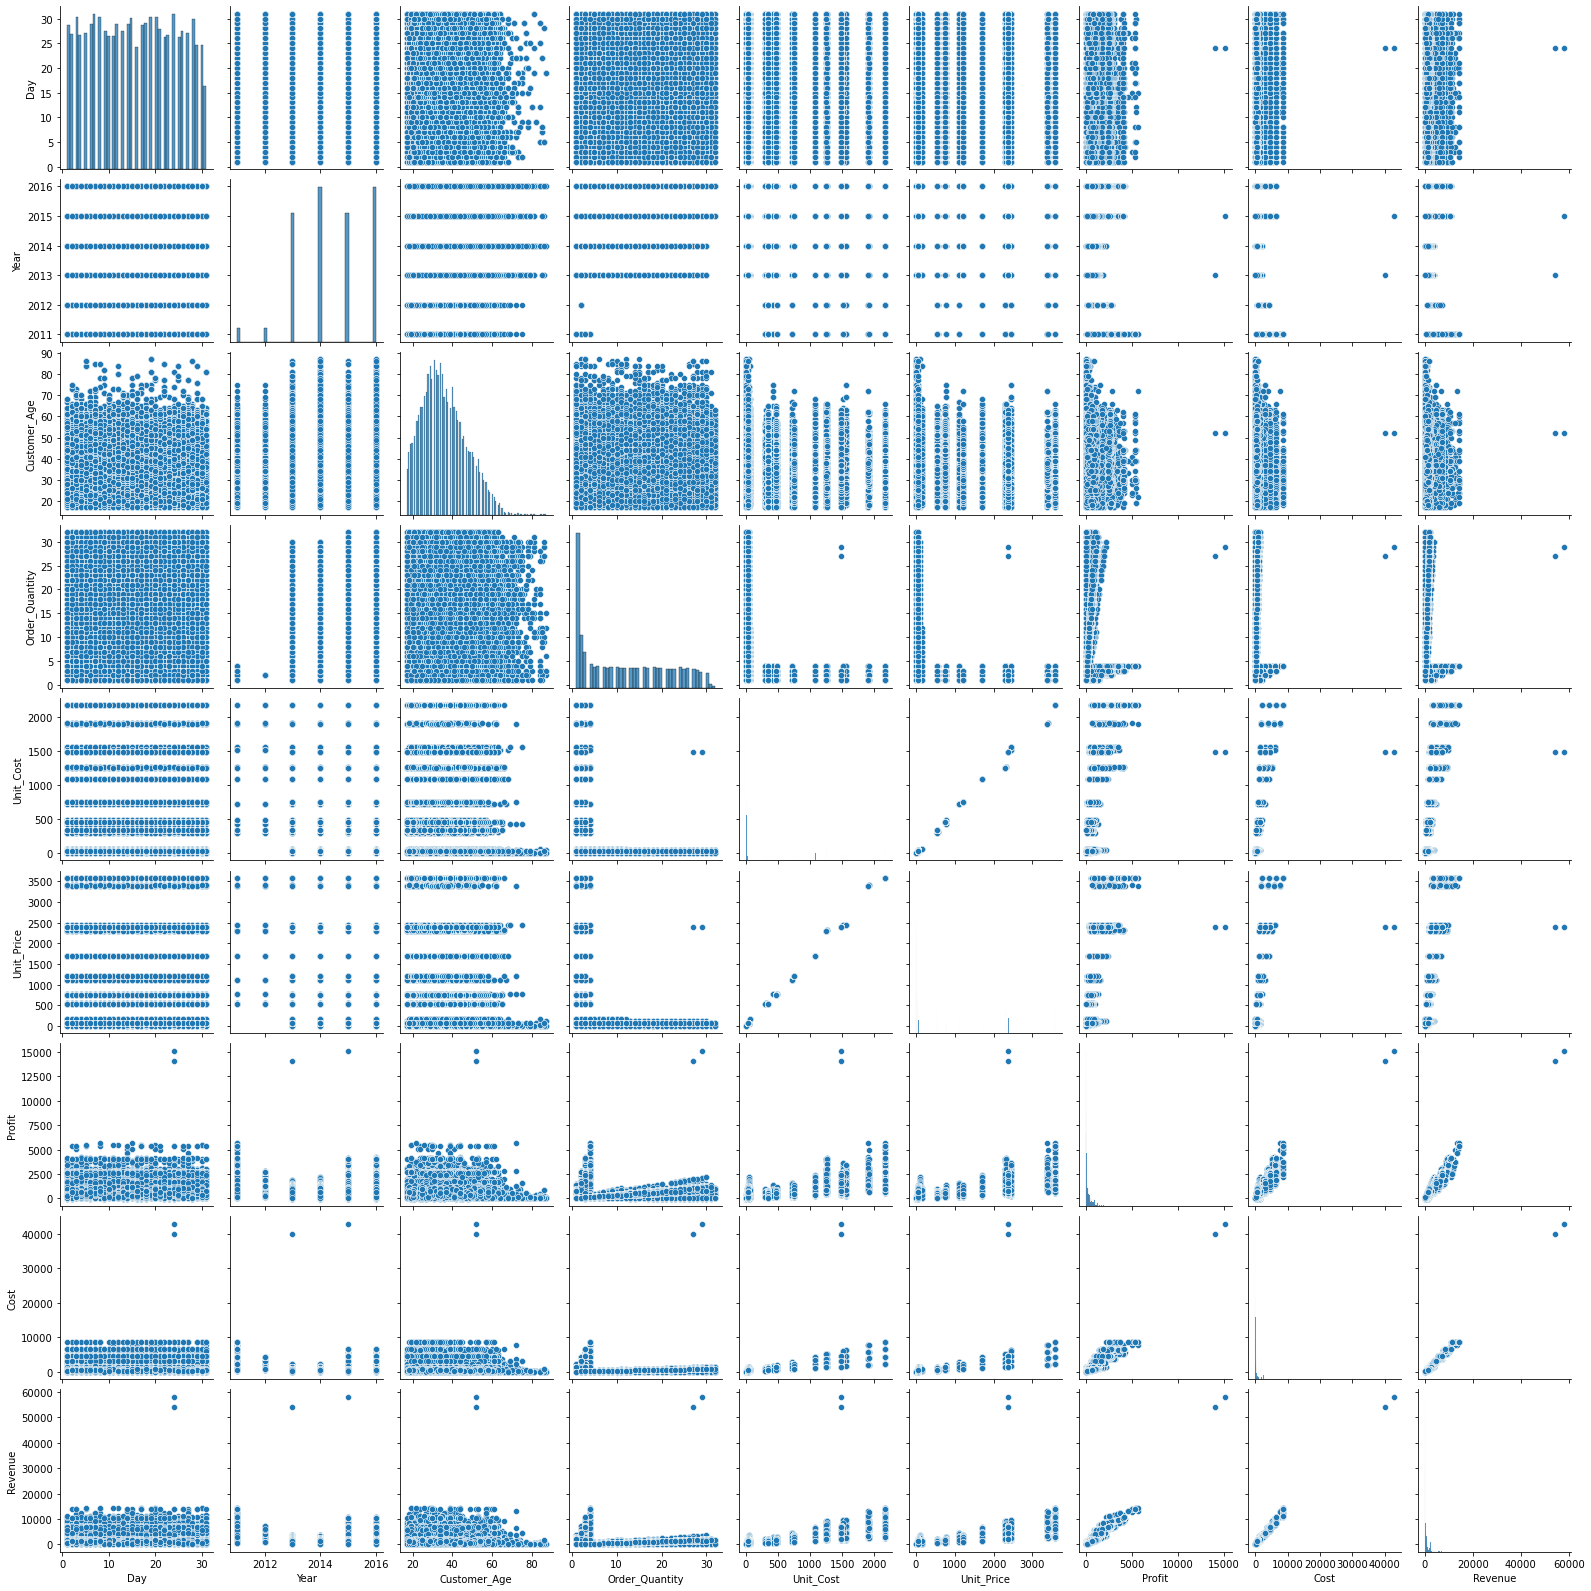

In [509]:
sns.pairplot(sales)

<AxesSubplot:>

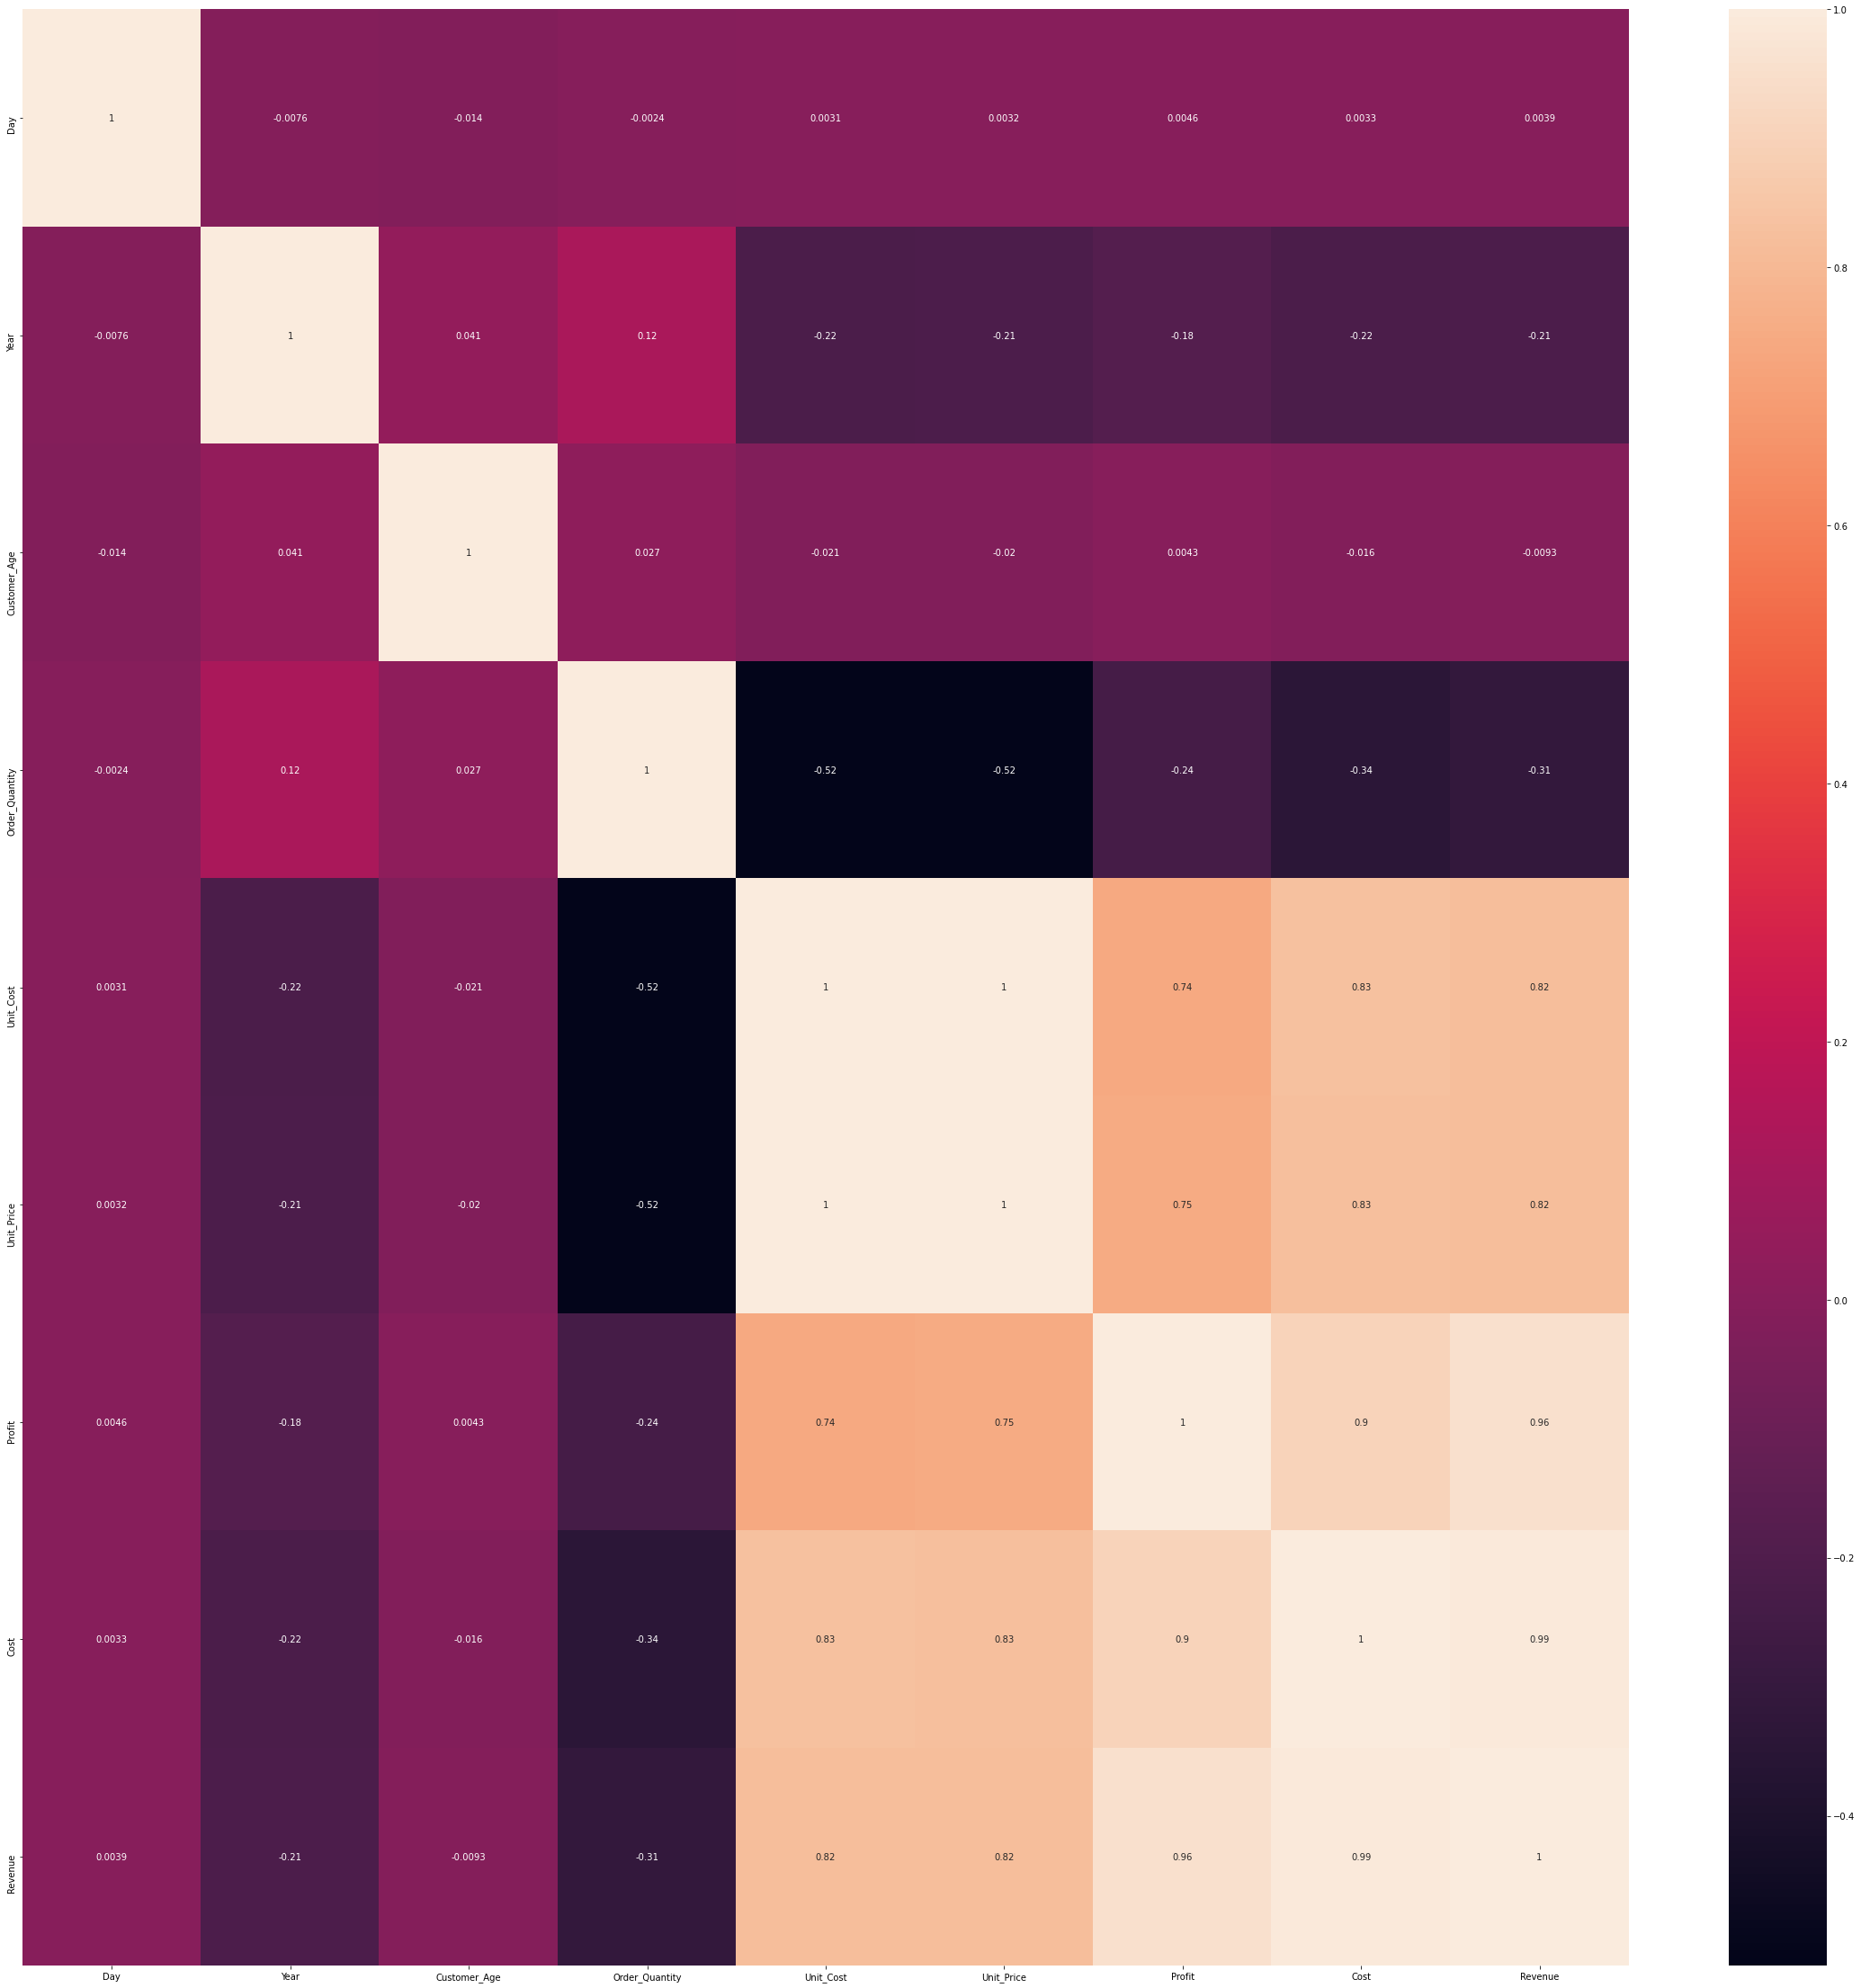

In [510]:
plt.figure(figsize = (40, 40))
sns.heatmap(sales.corr(), annot=True)

In [ ]:
#the pairplot and heatmap shows that the profit, cost, revenue, unit price, 
#unit cost are all very correlated, which is obvious!